In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import matplotlib.cm as cm
from PIL import Image
import matplotlib
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
Netflix_New = pd.read_csv("netflix_data.csv")

In [3]:
Netflix_New

,Unnamed: 0,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,2021,9
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,2021,9
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,2021,9
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,2021,9
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,2016,3
5328,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,2019,11
5329,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,2019,11
5330,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,2020,1


In [4]:
Netflix_New_Copy = Netflix_New

In [5]:
Netflix_New.shape

(5332, 15)

In [6]:
Netflix_New.head()

,Unnamed: 0,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,2021,9
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,2021,9
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,2021,9
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,2021,9
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,2021,9


In [7]:
Netflix_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5332 non-null   int64 
 1   show_id       5332 non-null   object
 2   type          5332 non-null   object
 3   title         5332 non-null   object
 4   director      5332 non-null   object
 5   cast          5332 non-null   object
 6   country       5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
 12  day_added     5332 non-null   int64 
 13  year_added    5332 non-null   int64 
 14  month_added   5332 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 625.0+ KB


In [8]:
Netflix_New.drop(['Unnamed: 0','director','cast','listed_in','description'], axis = 1, inplace = True)

In [9]:
Netflix_New[['letter', 'number']] = Netflix_New['show_id'].str.extract(r'(\D+)(\d+)', expand=False)

In [10]:
Netflix_New = Netflix_New.drop('show_id', axis = 1)
Netflix_New = Netflix_New.drop('letter', axis = 1)
Netflix_New = Netflix_New.rename(columns = {'number':'Show_id'})

In [11]:
Netflix_New['type']

0         Movie
1       TV Show
2         Movie
3         Movie
4         Movie
         ...   
5327      Movie
5328      Movie
5329      Movie
5330      Movie
5331      Movie
Name: type, Length: 5332, dtype: object

In [97]:
Netflix_New

,type,title,country,release_year,rating,duration,day_added,year_added,month_added,Show_id
0,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,24,2021,9,8
1,TV Show,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,24,2021,9,9
2,Movie,The Starling,United States,2021,PG-13,104 min,24,2021,9,10
3,Movie,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,23,2021,9,13
4,Movie,Jeans,India,1998,TV-14,166 min,21,2021,9,25
...,...,...,...,...,...,...,...,...,...,...
5327,Movie,Zinzana,"United Arab Emirates, Jordan",2015,TV-MA,96 min,9,2016,3,8802
5328,Movie,Zodiac,United States,2007,R,158 min,20,2019,11,8803
5329,Movie,Zombieland,United States,2009,R,88 min,1,2019,11,8805
5330,Movie,Zoom,United States,2006,PG,88 min,11,2020,1,8806


In [99]:
Netflix_New.to_csv('netflix_New.csv')

In [13]:
clustering_df = Netflix_New[['type', 'duration','rating','release_year']]
clustering_df


,type,duration,rating,release_year
0,Movie,125 min,TV-MA,1993
1,TV Show,9 Seasons,TV-14,2021
2,Movie,104 min,PG-13,2021
3,Movie,127 min,TV-MA,2021
4,Movie,166 min,TV-14,1998
...,...,...,...,...
5327,Movie,96 min,TV-MA,2015
5328,Movie,158 min,R,2007
5329,Movie,88 min,R,2009
5330,Movie,88 min,PG,2006


In [14]:
def Rating_pick(value):
    older_kids = ['TV-PG', 'PG', 'TV-Y7', 'TV-Y7-FV']
    kids = ['TV-G', 'G', 'TV-Y']
    teens = ['PG-13','TV-14']
    adult = ['R', 'NC-17', 'TV-MA', 'UR', 'NR']
    
    rating = 'Others'
    for column in older_kids + kids + teens + adult:
        if value[column] == 1:
            if column in older_kids:
                rating = 'Older Kids'
            elif column in kids :
                rating = 'Kids'
            elif column in teens :
                rating = 'Teens'
            elif column in adult:
                rating = 'Adult'
      
    return rating
ratings = pd.get_dummies(clustering_df['rating']).apply(lambda x: Rating_pick(x),axis=1)

In [15]:
clustering_df = pd.concat([clustering_df.drop(['type','rating'],axis =1),pd.get_dummies(ratings), pd.get_dummies(clustering_df['type'])], axis =1)

In [16]:
clustering_df

,duration,release_year,Adult,Kids,Older Kids,Teens,Movie,TV Show
0,125 min,1993,1,0,0,0,1,0
1,9 Seasons,2021,0,0,0,1,0,1
2,104 min,2021,0,0,0,1,1,0
3,127 min,2021,1,0,0,0,1,0
4,166 min,1998,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
5327,96 min,2015,1,0,0,0,1,0
5328,158 min,2007,1,0,0,0,1,0
5329,88 min,2009,1,0,0,0,1,0
5330,88 min,2006,0,0,1,0,1,0


In [17]:
clustering_df.to_csv('clustering_df.csv')

In [18]:
#Duration
def duration(row,column):
    text = row['duration'].split()
    if column == 'show':
        if row['Movie'] == 0:
          return int(text[0])
        else:
          return 0
    if column == 'movie':
        if row['Movie'] ==1:
          return int(text[0])
        else:
          return 0
clustering_df['show_duration'] = clustering_df.apply(lambda x: duration(x,'show'),axis =1)

clustering_df['movie_duration'] = clustering_df.apply(lambda x: duration(x,'movie'), axis=1)
      

In [19]:
clustering_df.drop('duration', axis = 1, inplace=True)

In [41]:
clustering_df

,release_year,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration
0,1993,1,0,0,0,1,0,0,125
1,2021,0,0,0,1,0,1,9,0
2,2021,0,0,0,1,1,0,0,104
3,2021,1,0,0,0,1,0,0,127
4,1998,0,0,0,1,1,0,0,166
...,...,...,...,...,...,...,...,...,...
5327,2015,1,0,0,0,1,0,0,96
5328,2007,1,0,0,0,1,0,0,158
5329,2009,1,0,0,0,1,0,0,88
5330,2006,0,0,1,0,1,0,0,88


In [43]:
clustering_df.to_csv('clustering_df.csv')

In [22]:
silhouette_score_ = [ ]
sum_of_sq_dist = {}
range_n_clusters = [i for i in range(2,21)]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10,random_state=10)
    preds = clusterer.fit_predict(clustering_df)
    centers = clusterer.cluster_centers_
    sum_of_sq_dist[n_clusters] = clusterer.inertia_

    score = silhouette_score(clustering_df, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])

In [23]:
Kmeans = pd.DataFrame(silhouette_score_ , columns = ["No of Clusters" , "Silhouette Score"])

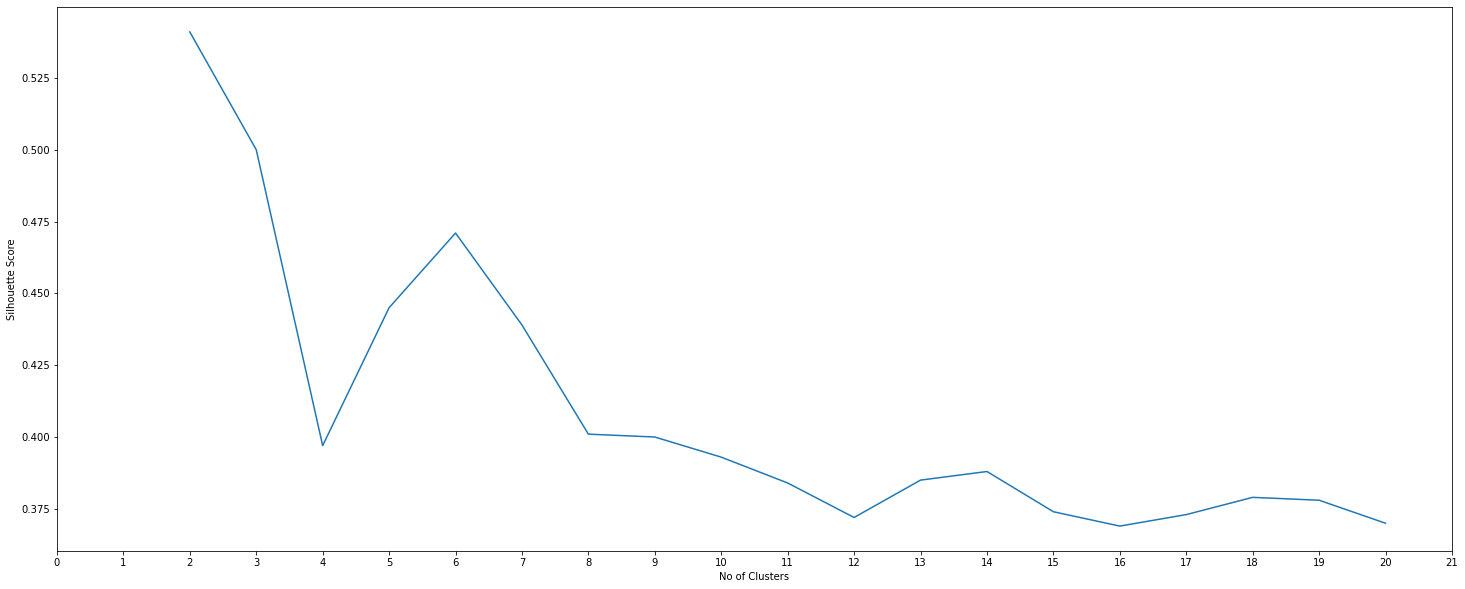

In [24]:
#Silhouetee
plt.figure(figsize=(25,10))
_ = sns.lineplot(x = Kmeans['No of Clusters'], y = Kmeans['Silhouette Score'])
_ = plt.xticks(ticks = np.arange(0,22,1))

In [25]:
Kmeans.sort_values(['Silhouette Score','No of Clusters'],ascending=False).head()

,No of Clusters,Silhouette Score
0,2,0.541
1,3,0.500
4,6,0.471
3,5,0.445
5,7,0.439


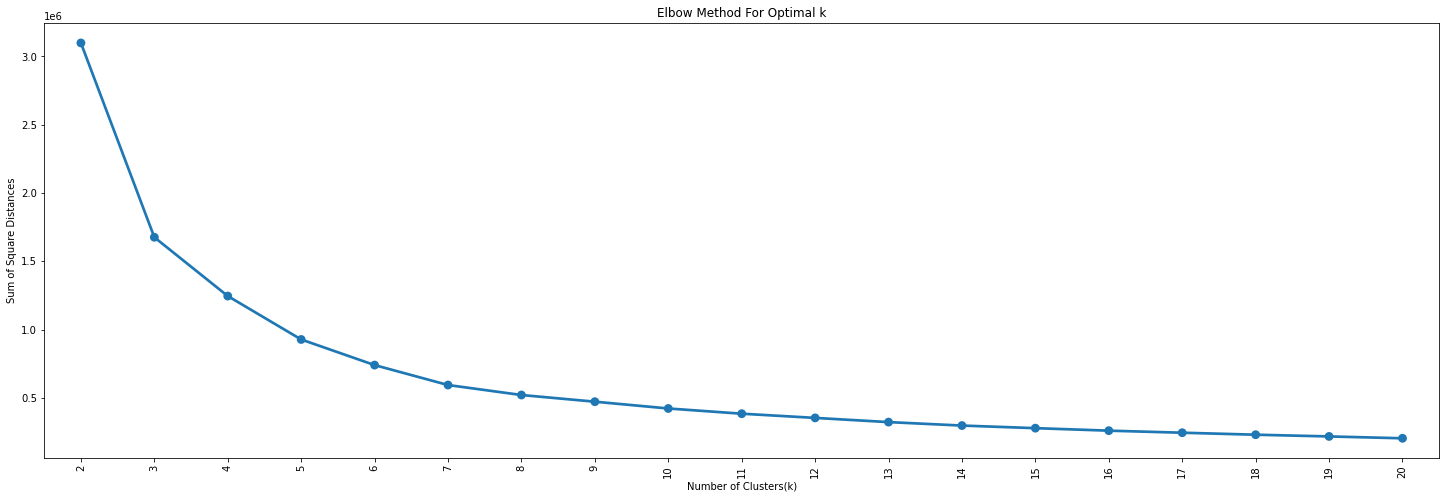

In [26]:
#Elbow method
plt.figure(figsize=(25,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(rotation = 90)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5414746789803718
For n_clusters = 3 The average silhouette_score is : 0.4997596258848756
For n_clusters = 4 The average silhouette_score is : 0.3973251127345642


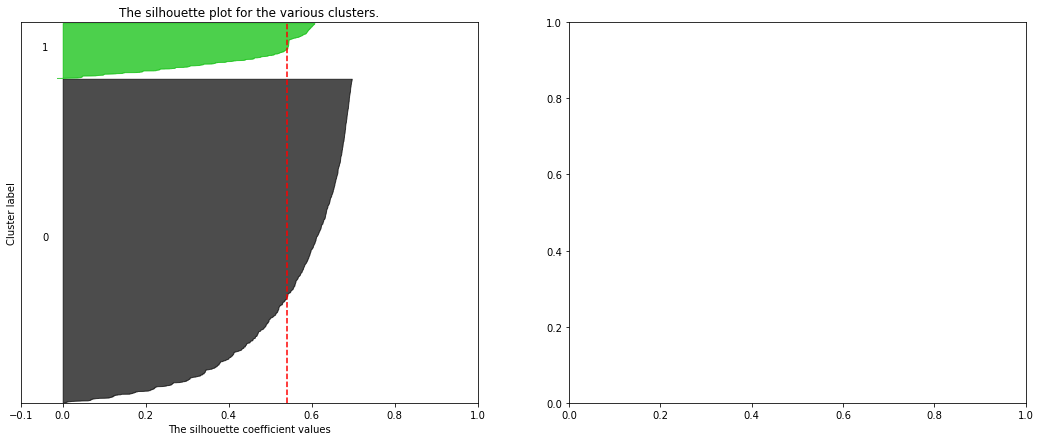

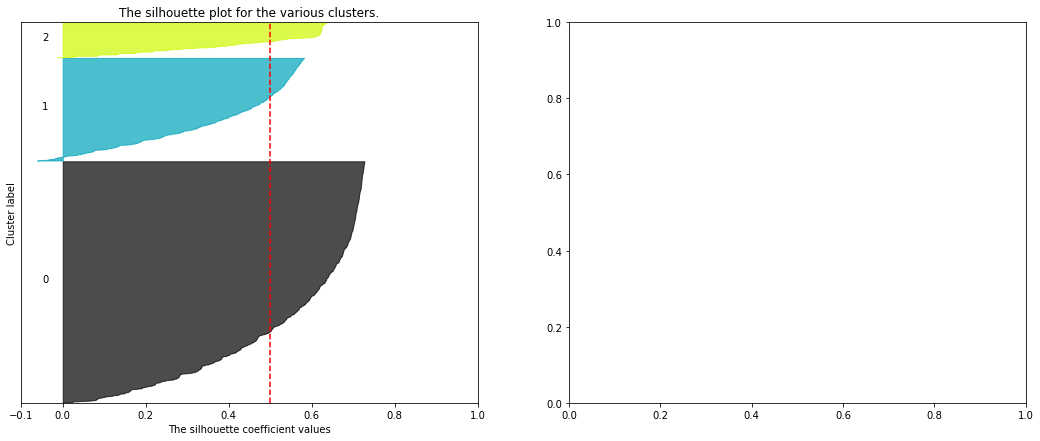

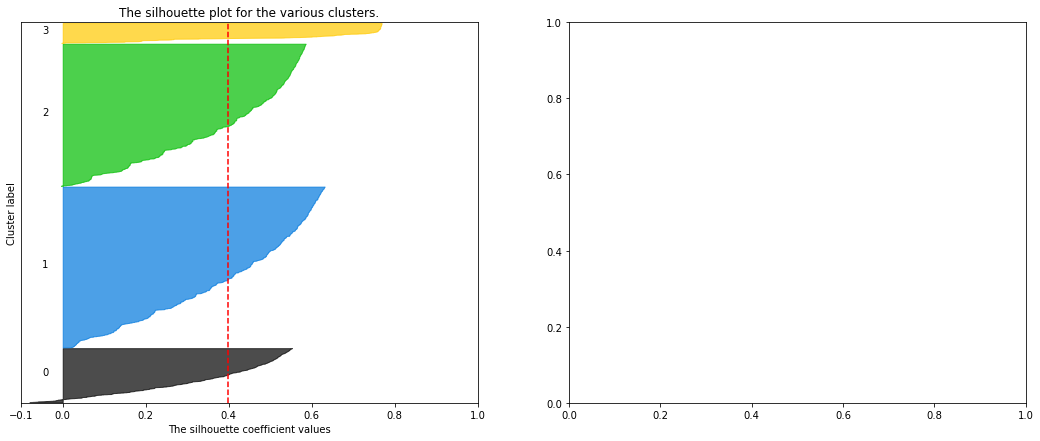

In [27]:
range_n_clusters = [i for i in range(2,5)]

                          
silhouette_score_ = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(clustering_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(clustering_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(clustering_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clustering_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



plt.show()

In [87]:
clusterer = KMeans(n_clusters= 4, n_init=10,random_state=10)
preds = clusterer.fit_predict(clustering_df)

In [88]:
predictions = pd.DataFrame(preds, columns = ['Clusters'])

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)


In [90]:
reduced = pd.DataFrame(pca.fit_transform(clustering_df), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
kmeans_cluster = pd.concat([reduced, predictions], axis=1)
     

In [91]:
hundred_colors = " #000000 dimgray #696969 silver #c0c0c0 darkslategray #2f4f4f darkolivegreen #556b2f olivedrab #6b8e23 sienna #a0522d seagreen #2e8b57 forestgreen #228b22 maroon2 #7f0000 midnightblue #191970 darkgreen #006400 olive #808000 darkslateblue #483d8b firebrick #b22222 lightslategray #778899 mediumseagreen #3cb371 rosybrown #bc8f8f rebeccapurple #663399 darkgoldenrod #b8860b darkkhaki #bdb76b darkcyan #008b8b steelblue #4682b4 chocolate #d2691e yellowgreen #9acd32 darkblue #00008b indigo #4b0082 limegreen #32cd32 darkseagreen #8fbc8f darkmagenta #8b008b maroon3 #b03060 mediumturquoise #48d1cc mediumaquamarine #66cdaa darkorchid #9932cc orangered #ff4500 orange #ffa500 gold #ffd700 yellow #ffff00 mediumvioletred #c71585 mediumblue #0000cd burlywood #deb887 chartreuse #7fff00 lime #00ff00 mediumorchid #ba55d3 springgreen #00ff7f darksalmon #e9967a crimson #dc143c aqua #00ffff deepskyblue #00bfff sandybrown #f4a460 mediumpurple #9370db blue #0000ff purple3 #a020f0 lightcoral #f08080 greenyellow #adff2f tomato #ff6347 thistle #d8bfd8 fuchsia #ff00ff palevioletred #db7093 khaki #f0e68c laserlemon #ffff54 cornflower #6495ed plum #dda0dd lightgreen #90ee90 lightblue #add8e6 deeppink #ff1493 mediumslateblue #7b68ee violet #ee82ee lightskyblue #87cefa aquamarine #7fffd4 lightgoldenrod #fafad2 hotpink #ff69b4 mistyrose #ffe4e1 lightcyan #e0ffff pink #ffc0cb"
colors = [color for color in hundred_colors.split(' ') if '#' in color]

#looping to shuffle colors
np.random.seed(151203)
shuffled = []
while len(colors)!=0:
  a = np.random.choice(colors)
  shuffled.append(a)
  colors.remove(a)

In [92]:
gyr = shuffled[:pd.Series(preds).nunique()]

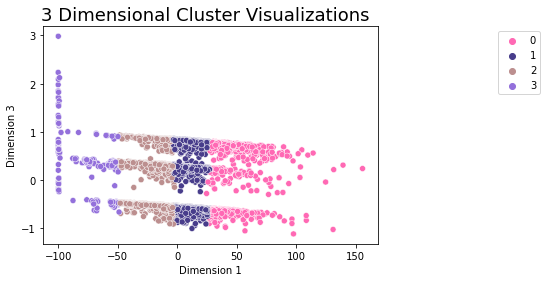

In [93]:
from matplotlib import transforms

plt.suptitle("3 Dimensional Cluster Visualizations", fontsize=18, y=0.95)

palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 3', data = kmeans_cluster, hue = 'Clusters',palette = sns.color_palette(gyr))
plt.legend(bbox_to_anchor=(1.5,1))


In [96]:
import scipy.cluster.hierarchy as sch
hier_ward_euc = sch.linkage(clustering_df, method = 'Minkowski', metric = 'Minkowski')

ValueError: Invalid method: Minkowski

In [ ]:
plt.figure(figsize=(30,15))
dendrogram = sch.dendrogram(hier_ward_euc)
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
clusters = []
scores = []
distances = []
for i in np.arange(5,75,5):
  hc = AgglomerativeClustering(n_clusters = None, distance_threshold = i, affinity = 'euclidean', linkage = 'ward')
  y_hc = hc.fit_predict(clustering_df)
  clusters.append(hc.labels_.max()+1)
  if (hc.labels_.max()+1 >=2) :
    scores.append(silhouette_score(clustering_df, y_hc))
  else:
    scores.append(1)
  distances.append(i)

hierarchical = pd.DataFrame({'Clusters': clusters, 
                             'Silhouette Scores': scores,
                             'Distance': distances})

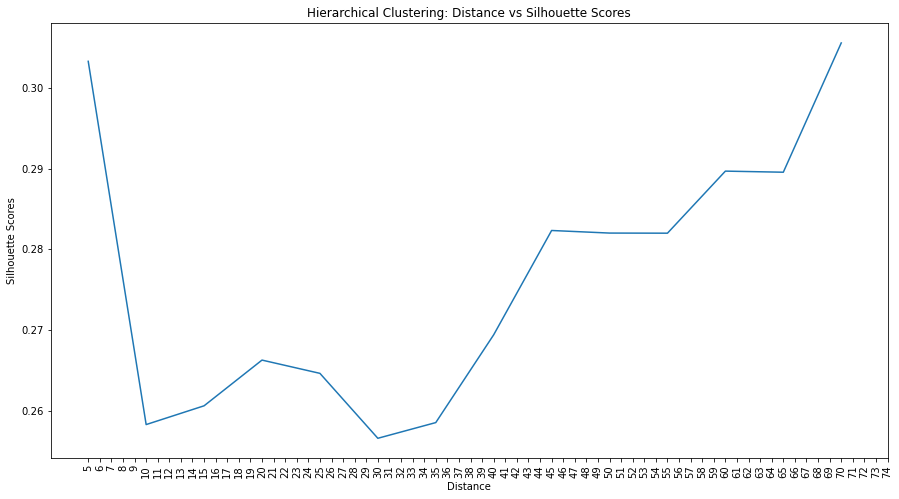

In [38]:
plt.figure(figsize =(15,8))
sns.lineplot(x = 'Distance', y = 'Silhouette Scores' , data = hierarchical)
a = plt.title('Hierarchical Clustering: Distance vs Silhouette Scores')
_ = plt.xticks(np.arange(5,75,1),rotation = 90)

In [39]:
hierarchical.sort_values('Silhouette Scores', ascending = False).head()

,Clusters,Silhouette Scores,Distance
13,43,0.305591,70
0,581,0.303313,5
11,51,0.289707,60
12,47,0.289571,65
8,68,0.282351,45


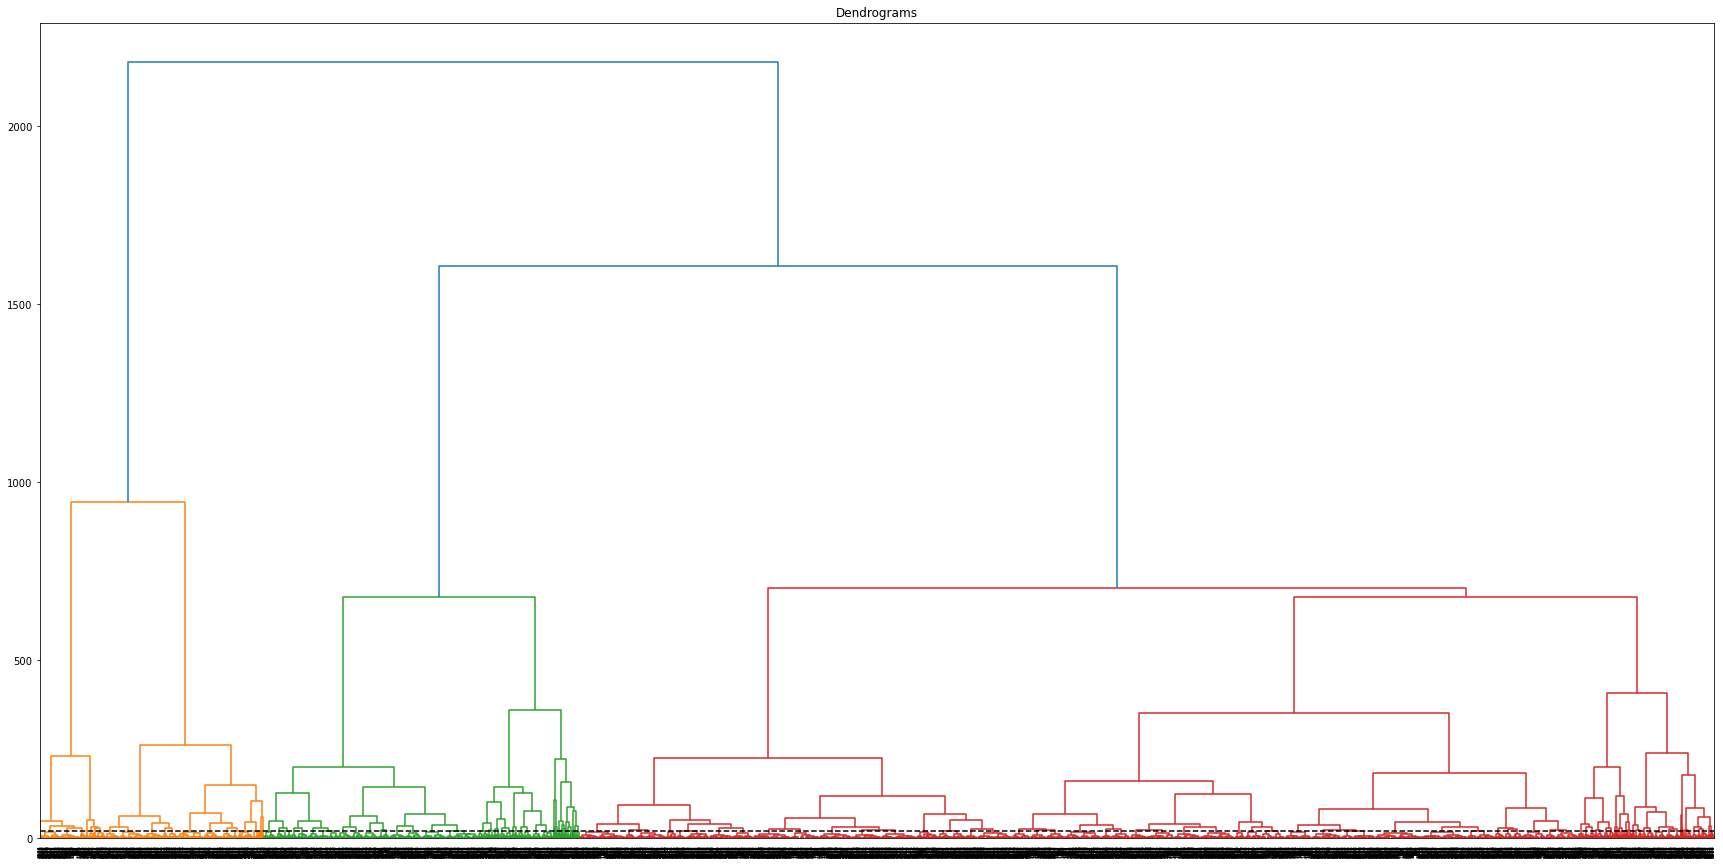

In [40]:
plt.figure(figsize =(30,15))
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(clustering_df, method='ward'))
plt.axhline(y= 20, color='black', linestyle='--')